In [143]:
# pip install vnstock

In [144]:
from vnstock import Vnstock
stock = Vnstock().stock(symbol='ACB', source='VCI')
dataframe = stock.quote.history(start='2024-01-01', end='2024-12-31', interval='1D')

In [145]:
# pip install TA-lib

In [146]:
import talib as ta

In [147]:
# pip install mplfinance
# pip install pandas

In [148]:
import mplfinance as mpf
import pandas as pd

In [149]:
dataframe['time'] = pd.DatetimeIndex(dataframe['time'])
dataframe = dataframe.set_index('time')


In [177]:
smaTimePeriod1 = 10
smaTimePeriod2 = 20
sma_1 = ta.SMA(dataframe['close'], timeperiod=smaTimePeriod1)
sma_2 = ta.SMA(dataframe['close'], timeperiod=smaTimePeriod2)
ema = ta.EMA(dataframe['close'], timeperiod=5)


In [ ]:
smaplot_1 = mpf.make_addplot(sma_1, label=f'${smaTimePeriod1} SMA')
smaplot_2 = mpf.make_addplot(sma_2, label=f'${smaTimePeriod2} SMA')
emaplot = mpf.make_addplot(ema, label='5 EMA')

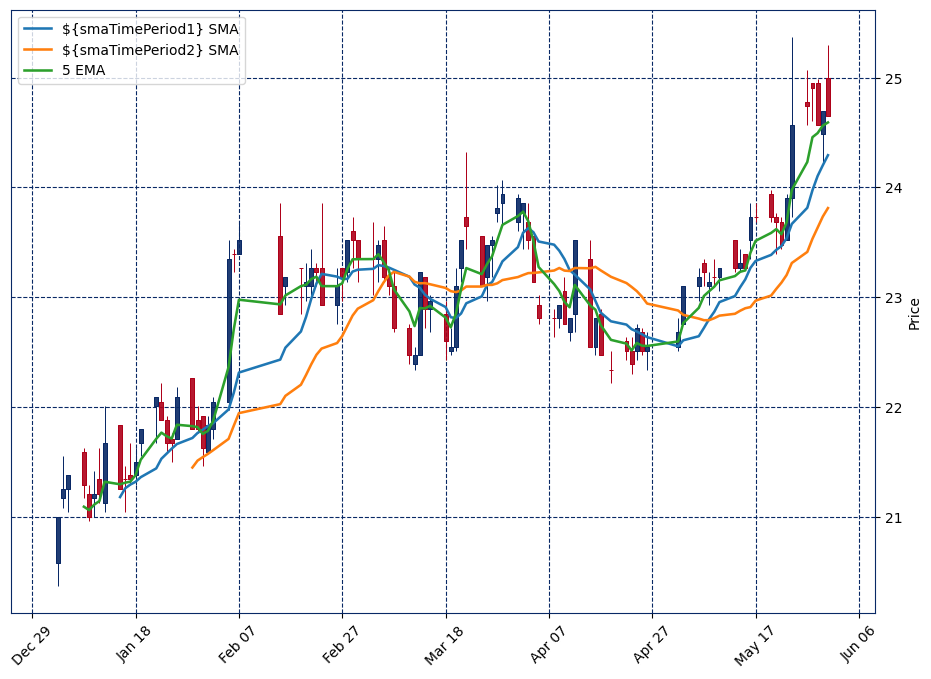

In [ ]:
mpf.plot(dataframe.iloc[1:100], 
         type='candle',
         style='starsandstripes',
         show_nontrading=True,
         addplot=[
            mpf.make_addplot(sma_1.iloc[1:100], label=f'${smaTimePeriod1} SMA'),
            mpf.make_addplot(sma_2.iloc[1:100], label=f'${smaTimePeriod2} SMA'),
            mpf.make_addplot(ema.iloc[1:100], label='5 EMA')
            ],
         figscale=1.5,
         )

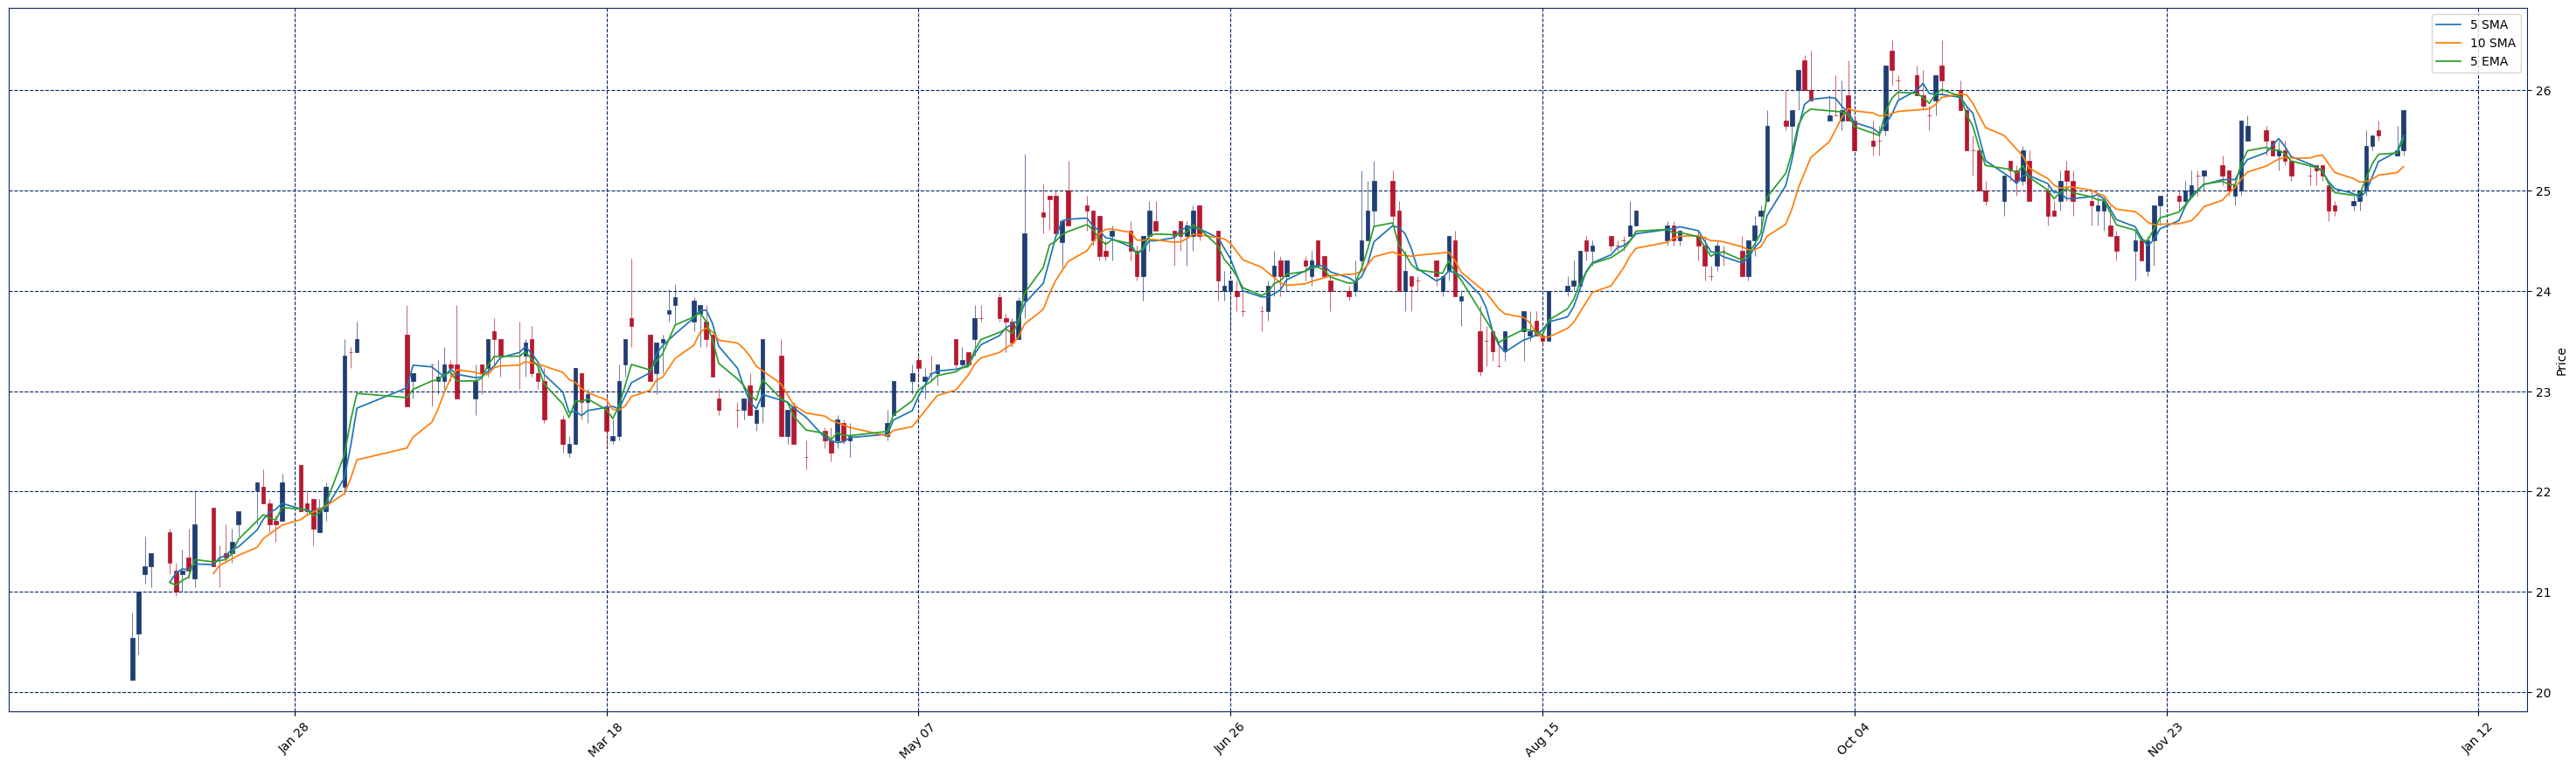

In [175]:
mpf.plot(dataframe, 
         type='candle',
         style='starsandstripes',
         show_nontrading=True,
         addplot=[smaplot_1, smaplot_2, emaplot],
         figscale=2,
         figratio=(20.00, 5.75)
         )